In [66]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
os.chdir(r"D:\Ritwik's Download\Innomatics Research Lab")

In [20]:
df = pd.read_csv("laptop_details.csv")

In [21]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


### The Data cleaning Part using Reg Expression

#### Finding Processor info

In [5]:
import re

In [41]:
c=0
for i in range(len(df.processor)):
    if df.Storage[i] == []:
        c+=1
        
print(c)

10


In [55]:
c=0
for i in range(len(df.processor)):
    if df.processor[i] == []:
        print(df.Feature[i])

In [28]:
regex = r'\b(?:AMD|Intel|M1|M2|Qualcomm)[\s\w]+Processor'
fun = lambda x: re.findall(regex, x)
df['processor'] = df['Feature'].apply(fun)

In [31]:
df.processor.isnull().sum()

0

#### Finding Ram info

In [35]:
regex = r'\d+\sGB[\s\w]+RAM'
fun = lambda x : re.findall(regex, x)
df['ram'] = df['Feature'].apply(fun)

#### Finding OS info

In [36]:
regex = r'(?:Windows|Chrome|Mac|Dos)[\s\w]+Operating System'
fun = lambda x : re.findall(regex, x, re.IGNORECASE)
df["os"] = df.Feature.apply(fun)

In [37]:
df

,Product,Rating,MRP,Feature,processor,ram,os
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[Windows 10 Operating System]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System]
...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM],[Chrome Operating System]
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 7 Octa Core Processor],[8 GB DDR4 RAM],[Windows 11 Operating System]
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,[AMD Ryzen 9 Octa Core Processor],[16 GB DDR5 RAM],[Windows 11 Operating System]
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,[Intel Core i7 Processor],[16 GB LPDDR5 RAM],[Windows 11 Operating System]


#### Finding Storage Info

In [163]:
df.Feature[715]

'Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty'

In [38]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

#### Brand Name info

In [39]:
regex = r'^\w+'

df["brand"] = df.Product.apply(lambda x: re.findall(regex, x))

In [40]:
df

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM],[Chrome Operating System],[],[ASUS]
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 7 Octa Core Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo]
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,[AMD Ryzen 9 Octa Core Processor],[16 GB DDR5 RAM],[Windows 11 Operating System],[1 TB SSD],[ASUS]
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,[Intel Core i7 Processor],[16 GB LPDDR5 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]


### Cleaning The Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   processor  720 non-null    object 
 5   ram        720 non-null    object 
 6   os         720 non-null    object 
 7   Storage    720 non-null    object 
 8   brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [46]:
df.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
processor      0
ram            0
os             0
Storage        0
brand          0
dtype: int64

#### Converting all list to string

In [169]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'processor', 'ram', 'os',
       'Storage', 'brand'],
      dtype='object')

In [44]:
df.processor = df.processor.apply(lambda x: ''.join(x))
df.ram = df.ram.apply(lambda x: ''.join(x))
df.os = df.os.apply(lambda x: ''.join(x))
df.Storage = df.Storage.apply(lambda x: ''.join(x))
df.brand = df.brand.apply(lambda x: ''.join(x))

In [59]:
df

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS


#### Replacing the rupees sign from the MRP

In [52]:
df.Storage[715]

'None'

In [83]:
for i in range(len(df.ram)):
    if df.processor[i] == '':
        df.processor[i] = 'None'

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/2053319099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.processor[i] = 'None'


In [60]:
convert_to_numeric = lambda x: float(x[1:].replace(',', ''))

# apply the lambda function to the 'mrp' column
df.MRP = df.MRP.apply(convert_to_numeric)

In [61]:
df.MRP = df.MRP.astype('int')

In [62]:
df

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS


### ML part for prediction

In [178]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'processor', 'ram', 'os',
       'Storage', 'brand'],
      dtype='object')

In [202]:
data = data[(data.processor != 'Qualcomm Snapdragon 7c Gen 2 Processor') & (df.processor != 'AMD Ryzen 7 Quad Core Processor') & (df.processor != 'AMD Ryzen 5 Dual Core Processor') & (df.processor != 'AMD Dual Core Processor') & (df.processor != 'AMD Ryzen 3 Hexa Core Processor')]

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1145334209.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[(data.processor != 'Qualcomm Snapdragon 7c Gen 2 Processor') & (df.processor != 'AMD Ryzen 7 Quad Core Processor') & (df.processor != 'AMD Ryzen 5 Dual Core Processor') & (df.processor != 'AMD Dual Core Processor') & (df.processor != 'AMD Ryzen 3 Hexa Core Processor')]


In [232]:
data.ram.value_counts()

8 GB DDR4 RAM               358
16 GB DDR4 RAM              143
16 GB DDR5 RAM               77
4 GB DDR4 RAM                25
16 GB LPDDR4X RAM            16
8 GB LPDDR4X RAM             15
32 GB DDR5 RAM               11
16 GB LPDDR5 RAM              9
16 GB Unified Memory RAM      6
8 GB Unified Memory RAM       5
4 GB LPDDR4 RAM               5
8 GB DDR5 RAM                 4
4 GB LPDDR4X RAM              3
32 GB DDR4 RAM                3
16 GB LPDDR4 RAM              1
32 GB LPDDR4X RAM             1
16 GB LPDDR3 RAM              1
Name: ram, dtype: int64

In [233]:
data = data[(data.ram != '16 GB LPDDR4 RAM') & (df.ram != '32 GB LPDDR4X RAM') & (df.ram != '16 GB LPDDR3 RAM')]

In [234]:
df = data

In [235]:
f = df[["brand", "processor", "ram", "os", "Storage"]]

In [236]:
f

,brand,processor,ram,os,Storage
0,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD
1,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
2,ASUS,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD
4,ASUS,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
...,...,...,...,...,...
715,ASUS,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None
716,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
717,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD
718,ASUS,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD


In [237]:
y = np.log(df['MRP'])
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
715    10.064330
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 680, dtype: float64

In [238]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(f, y, test_size=0.2, random_state=47)

In [240]:
df.head(1)

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo


In [286]:
# to handling the catagorical columns
step1 = ColumnTransformer(transformers=[
    ('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

In [287]:
# import numpy as np
# f = df[["brand", "processor", "ram", "os", "Storage"]]
# features = ['brand', 'ram', 'os', 'processor', 'Storage']
# X = ct.fit_transform(df[features])
# y = np.log(df['MRP'])

In [288]:
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [289]:
# X_train, X_test, y_train, y_test = train_test_split(f, y, test_size=0.2, random_state=47)

In [404]:
pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [405]:
df.iloc[1]

Product      Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...
Rating                                                     4.2
MRP                                                      39990
Feature      Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
processor                              Intel Core i3 Processor
ram                                              8 GB DDR4 RAM
os                                 Windows 11 Operating System
Storage                                             512 GB SSD
brand                                                   Lenovo
photo                                                     None
Name: 1, dtype: object

In [406]:
prediction = pipe.predict(X_test)
prediction.shape

(136,)

#### Accuracy score 

In [291]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,prediction))
print(mean_absolute_error(y_test,prediction))

0.9257558076523248
0.10006510691829555


In [369]:
# to check the prediction
brand = 'ASUS'
processor = 'Intel Core i7 Processor'
ram = '16 GB DDR4 RAM'
os = 'Windows 10 Operating System'
Storage = '512 GB SSD'

In [366]:
query = np.array([brand, processor, ram, os, Storage])
query = query.reshape(1,-1)

In [367]:
p = pipe.predict(query)[0]
np.exp(p)

C:\Users\RITWIK GANGULY\anaconda3\envs\Ritwik_DATA_Sci\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


86639.53522035787

#### Main Machine Learning Part(optional)

In [87]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'processor', 'ram', 'os',
       'Storage', 'brand'],
      dtype='object')

In [350]:
# define the feature set and the target variable
features = ["brand", "processor", "ram", "os", "Storage"]
target = 'MRP'

# encode the categorical features using OneHotEncoder
ct = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),features)
],remainder='passthrough')
X = ct.fit_transform(df[features])

# encode the target variable using LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(df[target])
y = df[target]

# split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=47)

In [398]:
# train a random forest regression model on the training set
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
model = rf.fit(X_train2, y_train2)
model

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [399]:
# make predictions on the testing set
y_pred = model.predict(X_test2)
y_pred

array([ 38711.99967337,  42307.73510261, 109872.81      ,  39735.38617925,
       139950.66285714, 123576.66666667,  69131.02674837,  58902.22669048,
       272654.42272727,  37205.26984392,  37029.2189642 , 160256.1747619 ,
        40021.27461538,  69463.65401609,  56413.48917383,  85990.        ,
        43053.71458333, 180136.4359707 ,  40021.27461538,  35684.42479522,
        57848.84261905,  39270.80544675,  69131.02674837,  40021.27461538,
        40021.27461538,  43053.71458333,  35512.27000545,  40021.27461538,
        98714.15678571,  43848.63056498,  35684.42479522,  45378.40004117,
        66557.70462131,  46067.16933333,  40021.27461538,  45418.91595238,
        37029.2189642 ,  38368.59616661,  38711.99967337, 152433.49499056,
       232447.77550505,  26991.61576923,  79188.66371139,  85990.        ,
        26856.56270833,  32086.45255707,  39735.38617925, 152433.49499056,
        67746.53542857,  39735.38617925, 152433.49499056,  32511.95055861,
        45418.91595238,  

In [195]:
data = df.copy()

In [346]:
df.shape

(680, 9)

In [370]:
l = [brand, processor, ram, os, Storage]

In [335]:
features

['brand', 'processor', 'ram', 'os', 'Storage']

In [372]:
new_data = pd.DataFrame([[brand, processor, ram, os, Storage]], columns=features)
new_data

,brand,processor,ram,os,Storage
0,ASUS,Intel Core i7 Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD


In [402]:
new_data_encoded = ct.transform(new_data)

In [403]:
prediction_encoded = rf.predict(new_data_encoded)
prediction_encoded[0].round(2)

91196.68

In [400]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test2,y_pred))
print(mean_absolute_error(y_test2,y_pred))

0.9205374357205571
7704.778754844854


In [360]:
# new_data = pd.DataFrame([["HP", "Intel Core i3 Processor", "8 GB DDR4 RAM", "Windows 11 Operating System", "256 GB SSD"]], columns=features)
# new_data_encoded = ct.transform(new_data)

# # make a prediction on the new data
# prediction_encoded = rf.predict(new_data_encoded)

# # convert the predicted target variable back to its original form
# prediction_orig = le.inverse_transform(prediction_encoded)

# # print the predicted price in its original form
# print("Predicted Price:", prediction_orig[0])

### Exporting the Model

In [361]:
import pickle 

In [401]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [376]:
df

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [377]:
df.brand.value_counts()

ASUS         245
Lenovo       195
HP            60
DELL          50
RedmiBook     31
acer          29
MSI           28
Infinix       20
APPLE         18
realme         4
Name: brand, dtype: int64

In [381]:
os.chdir(r'C:\Users\RITWIK GANGULY\PycharmProjects\Streamlit_ritwik\Laptop_price_recomendation\resources\images')

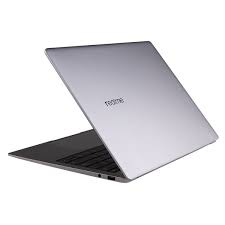

In [387]:
l = []
img = Image.open("realme.jpeg")
img

In [390]:
from PIL import Image
import os

# Define the path to the directory containing the images
image_dir = 'C:\\Users\\RITWIK GANGULY\\PycharmProjects\\Streamlit_ritwik\\Laptop_price_recomendation\\resources\\images'


df["photo"] = None
# Loop through the rows of the dataframe
for index, row in df.iterrows():
    # Construct the filename of the image to insert
    image_filename = row['brand'] + '.jpeg'
    # Check if the image exists in the specified directory
    image_path = os.path.join(image_dir, image_filename)
    if os.path.exists(image_path):
        # Load the image and insert it into the dataframe
        image = Image.open(image_path)
        df["photo"]["index"] = image

# View the resulting dataframe
print(df.head())

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

                                             Product  Rating    MRP  \
0  Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...     4.2  36990   
1  Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...     4.2  39990   
2  ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...     4.3  32990   
3  HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...     4.4  49990   
4  ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...     4.4  49990   

                                             Feature  \
0  Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...   
1  Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...   
2  Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...   
3  AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...   
4  Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...   

                         processor            ram  \
0          Intel Core i3 Processor  8 GB DDR4 RAM   
1          Intel Core i3 Processor  8 GB DDR4 RAM   
2          Intel Core i3 Processor  8 GB DDR4 RAM   
3  AMD Ryzen 5 Hexa Core

C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C:\Users\RITWIK~1\AppData\Local\Temp/ipykernel_23212/1316824053.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["photo"]["index"] = image
C

In [392]:
df.drop(['photo'], axis=1)

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [394]:
df.Product[100]

'MSI Core i7 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce RTX 3050/144 Hz) ...'

In [396]:
df.Product.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,  10,  11,
            ...
            709, 710, 711, 713, 714, 715, 716, 717, 718, 719],
           dtype='int64', length=680)

In [413]:
df

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand,photo
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP,None
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,None
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None,ASUS,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,None
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS,None


## Visualization

In [414]:
import plotly.express as px
import plotly.graph_objects as go

In [417]:
draft_template = go.layout.Template()
draft_template.layout.annotations = [
    dict(
        name="draft watermark",
        text="Ritwik",
        textangle=-30,
        opacity=0.1,
        font=dict(color="red", size=100),
        xref="paper",
        yref="paper",
        x=0.5,
        y=0.5,
        showarrow=False,
    )
]

In [432]:
data = df.copy()

In [433]:
data = data[data["Storage"] == "256 GB SSD"]

In [434]:
avg_price = data.groupby("brand")["MRP"].mean().reset_index()
avg_price

,brand,MRP
0,APPLE,98740.000000
1,ASUS,36808.750000
2,DELL,39391.111111
3,HP,33934.833333
4,Infinix,28390.000000
5,Lenovo,36218.914894
6,RedmiBook,31990.000000
7,acer,27615.000000
8,realme,46990.000000


In [438]:
fig = px.bar(avg_price, x="brand", y="MRP", color = "brand")
fig.update_layout(template = draft_template, paper_bgcolor = "black", title="<b> Avarage Price of Laptop of All Brand")
fig.update_layout(
    font_color="white",
    title_font_color="white",
    legend_title_font_color="white"
)
fig.show()

In [447]:
total_freq = df.processor.value_counts()[:10]
total_freq

Intel Core i5 Processor              147
Intel Core i3 Processor              129
AMD Ryzen 9 Octa Core Processor       86
AMD Ryzen 7 Octa Core Processor       79
Intel Core i7 Processor               49
AMD Ryzen 5 Hexa Core Processor       48
AMD Ryzen 3 Dual Core Processor       42
AMD Ryzen 5 Quad Core Processor       36
Intel Celeron Dual Core Processor     18
Intel Core i9 Processor               10
Name: processor, dtype: int64

In [449]:
fig = go.Figure(data=[go.Pie(labels=total_freq.index, values=total_freq, pull=[0, 0.2], hole = 0.3, title = "<b> RG </b>")])
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.update_layout(paper_bgcolor = "black", title="<b> Total Brands Processor Wise(TOP 10)")
fig.update_layout(
    font_color="white",
    title_font_color="white",
    legend_title_font_color="white"
)
fig.show()

In [451]:
stat = df.groupby(['brand']).agg({'MRP' : ['min', 'max', 'mean']})
stat

MRP                       
             min     max           mean
brand                                  
APPLE      88990  241990  154156.666667
ASUS       14990  361990  115463.775510
DELL       34990  434830   76369.400000
HP         25990  199990   65205.650000
Infinix    20990   52990   36890.000000
Lenovo     19490  157990   45546.835897
MSI        43990  389990  122719.250000
RedmiBook  31990   39990   39731.935484
acer       24990  155490   63511.275862
realme     46990   64999   57992.250000

In [456]:
line = df.groupby("ram")["MRP"].mean().reset_index()
line

,ram,MRP
0,16 GB DDR4 RAM,99541.601399
1,16 GB DDR5 RAM,179187.116883
2,16 GB LPDDR4X RAM,72303.062500
3,16 GB LPDDR5 RAM,125878.888889
4,16 GB Unified Memory RAM,222490.000000
5,32 GB DDR4 RAM,291603.333333
6,32 GB DDR5 RAM,287080.909091
7,4 GB DDR4 RAM,32571.880000
8,4 GB LPDDR4 RAM,21670.000000
9,4 GB LPDDR4X RAM,23490.000000


In [459]:
fig = px.line(line, x="ram", y="MRP")
fig.update_layout(template = draft_template, paper_bgcolor = "black", title="<b> Avarage Price RAM wise of All Brand")
fig.update_layout(
    font_color="white",
    title_font_color="white",
    legend_title_font_color="white"
)
fig.show()

In [460]:
os_plot = df.groupby("os")["MRP"].mean().reset_index()
os_plot

,os,MRP
0,Chrome Operating System,22332.857143
1,DOS Operating System,41823.333333
2,Mac OS Operating System,154156.666667
3,Windows 10 Operating System,69928.333333
4,Windows 11 Operating System,81886.823529


In [464]:
fig = px.bar(os_plot, x="os", y="MRP", color = "os")
fig.update_layout(template = draft_template, paper_bgcolor = "black", title="<b> Operating System Wise Avarage Price of All Brands")
fig.update_layout(
    font_color="white",
    title_font_color="white",
    legend_title_font_color="white"
)
fig.show()

In [465]:
df

,Product,Rating,MRP,Feature,processor,ram,os,Storage,brand,photo
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP,None
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,None
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,None,ASUS,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,None
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS,None


# Thanks For Visiting